In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
data=pd.read_csv("bostunv.csv", header=0, index_col=0, parse_dates=True, squeeze=True)

In [86]:
data.head()

1966-01-01
1966-02-01    39
1966-03-01    50
1966-04-01    40
1966-05-01    43
1966-06-01    38
Name: 41, dtype: int64

In [87]:
data.describe()

count    105.000000
mean     174.361905
std      112.015806
min       29.000000
25%       77.000000
50%      149.000000
75%      273.000000
max      487.000000
Name: 41, dtype: float64

In [88]:
traindata=pd.read_csv('bostunv.csv',header=None,index_col=0,parse_dates=True,squeeze=True)
traindata.describe()

count    106.000000
mean     173.103774
std      112.231133
min       29.000000
25%       74.750000
50%      144.500000
75%      271.750000
max      487.000000
Name: 1, dtype: float64

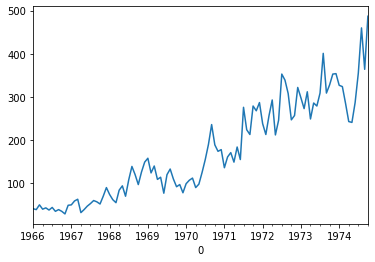

In [89]:
traindata.plot()
plt.show()

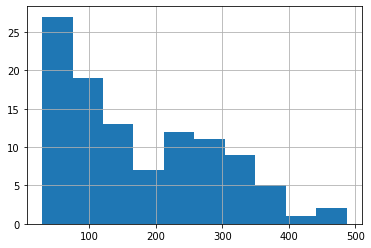

In [90]:
traindata.hist()
plt.show()

In [91]:
diff=list()
for i in range(1,len(traindata)):
    value=traindata[i]-traindata[i-1]
    diff.append(value)
stationary=pd.Series(diff)

In [92]:
stationary

0       -2
1       11
2      -10
3        3
4       -5
      ... 
100     46
101     68
102    105
103    -96
104    123
Length: 105, dtype: int64

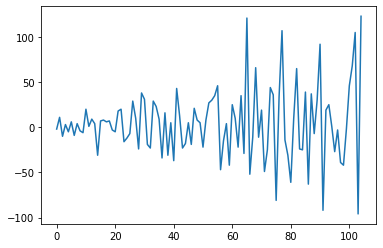

In [93]:
stationary.plot()
plt.show()

In [94]:
#Performing adfuller test
from statsmodels.tsa.stattools import adfuller
result=adfuller(stationary)
print(result[1])

0.0015136348242122417


In [95]:
resultorg=adfuller(traindata)
print(resultorg[1])

0.9915954694448041


In [96]:
#original data is non stationary with pvalue>0.05
#data with 1 difference is stationary with pvalue<0.05

In [97]:
stationary.to_csv('stationary.csv',header=False)

In [98]:
st=pd.read_csv("stationary.csv",header=None,index_col=0,parse_dates=True,squeeze=True)

In [99]:
st

0
0       -2
1       11
2      -10
3        3
4       -5
      ... 
100     46
101     68
102    105
103    -96
104    123
Name: 1, Length: 105, dtype: int64

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


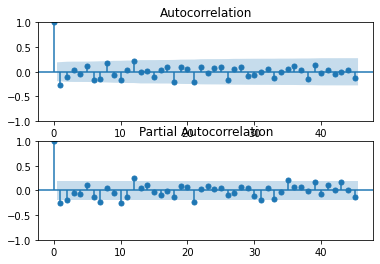

In [100]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure()
plt.subplot(211)
plot_acf(st,lags=45,ax=plt.gca())
plt.subplot(212)
plot_pacf(st,lags=45,ax=plt.gca())
plt.show()

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


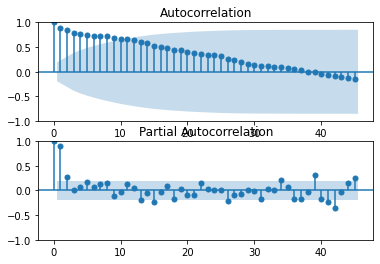

In [101]:
plt.figure()
plt.subplot(211)
plot_acf(traindata,lags=45,ax=plt.gca())
plt.subplot(212)
plot_pacf(traindata,lags=45,ax=plt.gca())
plt.show()

In [102]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.svm import SVC

In [103]:
#using original non stationary data
X=traindata.values

In [104]:
X=X.astype('float32')

In [105]:
train_size=int(len(X)*0.70)
train,test=X[0:train_size],X[train_size:]

In [106]:
print(train.size)
print(test.size)

74
32


In [107]:
from sklearn.metrics import mean_squared_error
from math import sqrt
history=[x for x in train]
predictions=[]
for i in range(len(test)):
    model=ARIMA(history,order=(0,1,2))
    model_fit=model.fit()
    yhat=model_fit.forecast()[0]
    predictions.append(yhat)
    obs=test[i]
    history.append(obs)
rmse=sqrt(mean_squared_error(test,predictions))
print(rmse)

56.07047665548941


In [108]:
#stationary data
x=st.values
x=x.astype('float32')
train_size=int(len(x)*0.7)
train2,test2=x[0:train_size],x[train_size:]
history2=[y for y in train]
predictions2=[]
for i in range(len(test2)):
    model2=ARIMA(history2,order=(0,1,2))
    model_fit2=model2.fit()
    yhat2=model_fit2.forecast()[0]
    predictions2.append(yhat2)
    obs2=test2[i]
    history2.append(obs2)
rmse=sqrt(mean_squared_error(test2,predictions2))
print(rmse)

85.43981267179105


In [109]:
#WITH SVM
series=pd.read_csv('bostunv.csv',header=0,index_col=0,parse_dates=True,squeeze=True)

In [110]:
temps=pd.DataFrame(series.values)
data2=pd.concat([temps.shift(2),temps.shift(1),temps],axis=1)
data2.columns=['t-1','t','t+1']
data2.head()

,t-1,t,t+1
0,NaN,NaN,39
1,NaN,39.0,50
2,39.0,50.0,40
3,50.0,40.0,43
4,40.0,43.0,38


In [111]:
data2.dropna(inplace=True)

In [112]:
data2

,t-1,t,t+1
2,39.0,50.0,40
3,50.0,40.0,43
4,40.0,43.0,38
5,43.0,38.0,44
6,38.0,44.0,35
...,...,...,...
100,243.0,241.0,287
101,241.0,287.0,355
102,287.0,355.0,460
103,355.0,460.0,364


In [113]:
data2.describe()

,t-1,t,t+1
count,103.000000,103.000000,103.000000
mean,169.485437,172.640777,176.883495
std,107.045424,107.947596,111.605951
min,29.000000,29.000000,29.000000
25%,75.500000,77.500000,81.000000
50%,140.000000,149.000000,149.000000
75%,262.500000,270.500000,274.500000
max,460.000000,460.000000,487.000000


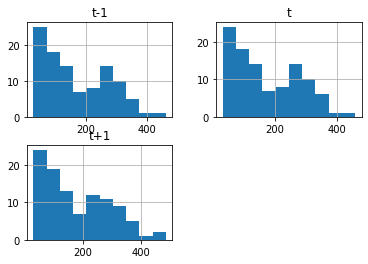

In [114]:
data2.hist()
plt.show()

In [115]:
y=data2['t+1'].values

In [116]:
data2=data2.drop(columns=['t+1'],axis=1)

In [117]:
X=data2.values

In [118]:
X.shape

(103, 2)

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X=ss.fit_transform(X)

In [120]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [121]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(82, 2)
(82,)
(21, 2)
(21,)


In [122]:
from sklearn.svm import LinearSVR
lsvm=LinearSVR()
lsvm.fit(x_train,y_train)

LinearSVR()

In [123]:
pred=lsvm.predict(x_test)

In [125]:
rmse=sqrt(mean_squared_error(pred,y_test))
print(rmse)

153.66263503975188


63.83436690067456
190
